In [52]:
import pandas as pd
import numpy as np
import os
sep=os.sep
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import json
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import copy
from sklearn import svm
import seaborn as sns
import glob

In [53]:
base = 'test/output/remote/simulatorRun/'
base_pth_sc = base + sep + 'fsv_volumes_from_scratch'
base_pth_pt = base + sep + 'fsv_volumes_pretrained'

In [54]:
stopped_sc = []
for f in os.listdir(base_pth_sc):
    if 'test' in f:
        continue
    log = json.loads(open(base_pth_sc+os.sep+f+os.sep+'logs.json').read())
    e = log['best_val_epoch']
    stopped_sc.append(e)

In [76]:
stopped_pt = []
for f in os.listdir(path):
    if 'test' in f:
        continue
    log = json.loads(open(path+os.sep+f+os.sep+'logs.json').read())
    e = log['best_val_epoch']
    stopped_pt.append(e)

In [ ]:
for fold in range(10):
    

In [67]:
data = np.array([stopped_sc, stopped])
data = np.rollaxis(data, 1, 0)

In [68]:
df_ep = pd.DataFrame(data=data, columns=['From scratch', 'Pretrained'])

Text(0, 0.5, 'Number of Epochs for convergence.')

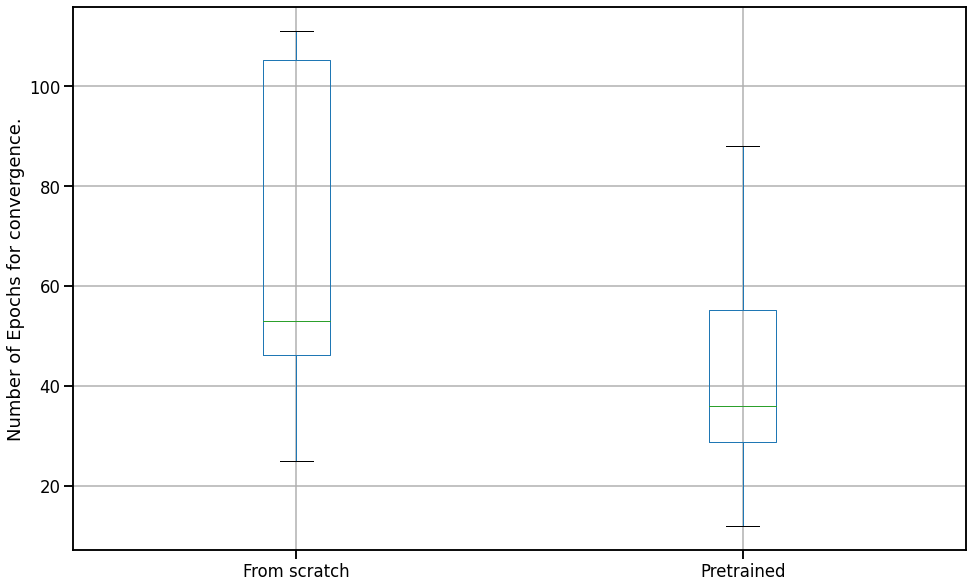

In [75]:
df_ep.boxplot()
plt.ylabel('Number of Epochs for convergence.')

In [ ]:
sns.boxplot(x=)

In [100]:
sum(stopped_sc)/len(stopped_sc), 'epochs on average from scratch'

(68.5, 'epochs on average from scratch')

In [101]:
sum(stopped)/len(stopped), 'epochs on average with pretraining'

(42.7, 'epochs on average with pretraining')

In [147]:
EPOCH = [['Experiment', 'Stopped on epoch']]
SCORE = [['Experiment','Score','Value']]
for fold in range(10):
    path_sc = base_pth_sc + sep + f'fold_{fold}' + sep + 'test_metrics.csv'
    path_pt = base_pth_pt + sep + f'fold_{fold}' + sep + 'test_metrics.csv'
    
    line_sc = open(path_sc).readlines()[1].split(',')
    a_sc, f1_sc = float(line_sc[1]), float(line_sc[2])
    SCORE.append(['Acc. from scratch', 'Accuracy', a_sc])
    SCORE.append(['Acc. from scratch', 'F1', f1_sc])
    
    line_pt = open(path_pt).readlines()[1].split(',')
    a_pt, f1_pt = float(line_pt[1]), float(line_pt[2])
    SCORE.append(['Acc. with pre-training', 'Accuracy', a_pt])
    SCORE.append(['Acc. with pre-training', 'F1', f1_pt])
    
    log_sc = json.loads(open(base_pth_sc+sep+f'fold_{fold}' + sep + 'logs.json').read())
    log_pt = json.loads(open(base_pth_pt+sep+f'fold_{fold}' + sep + 'logs.json').read())
    
    EPOCH.append(['Convergence from scratch.', log_sc['best_val_epoch']])
    EPOCH.append(['Convergence with pre-training.', log_pt['best_val_epoch']])

In [148]:
df = pd.DataFrame(SCORE[1:], columns=SCORE[0])

In [149]:
plt.rcParams['figure.figsize'] = 16, 10
sns.set_context("talk")

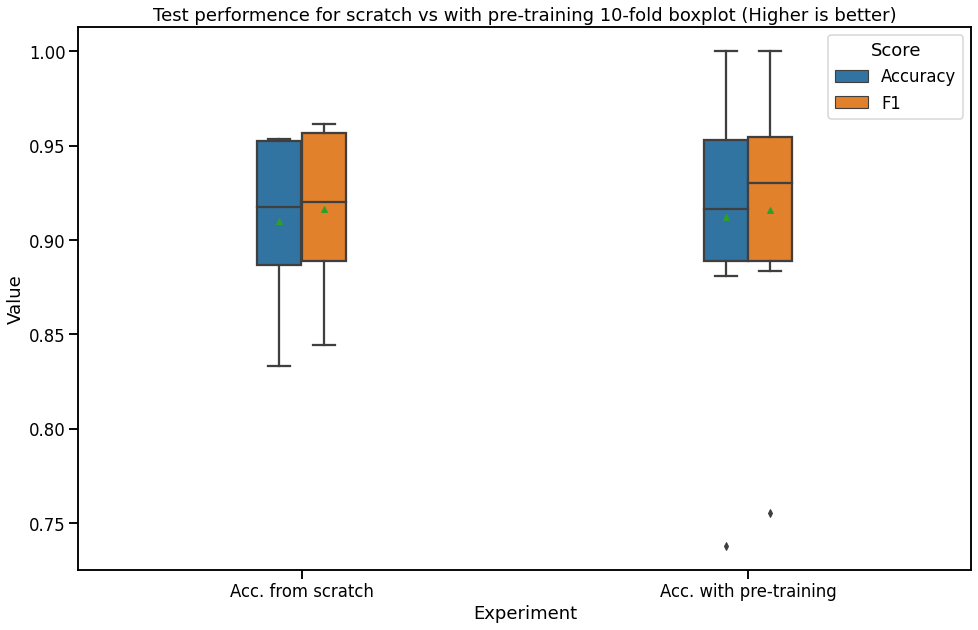

In [156]:
plt.title('Test performence for scratch vs with pre-training 10-fold boxplot (Higher is better)')
ax = sns.boxplot(x='Experiment', y='Value', hue='Score', data=df, width=0.2, showmeans=True)
plt.savefig('assets/perf_box.png')

In [151]:
df_ep = pd.DataFrame(EPOCH[1:], columns=EPOCH[0])

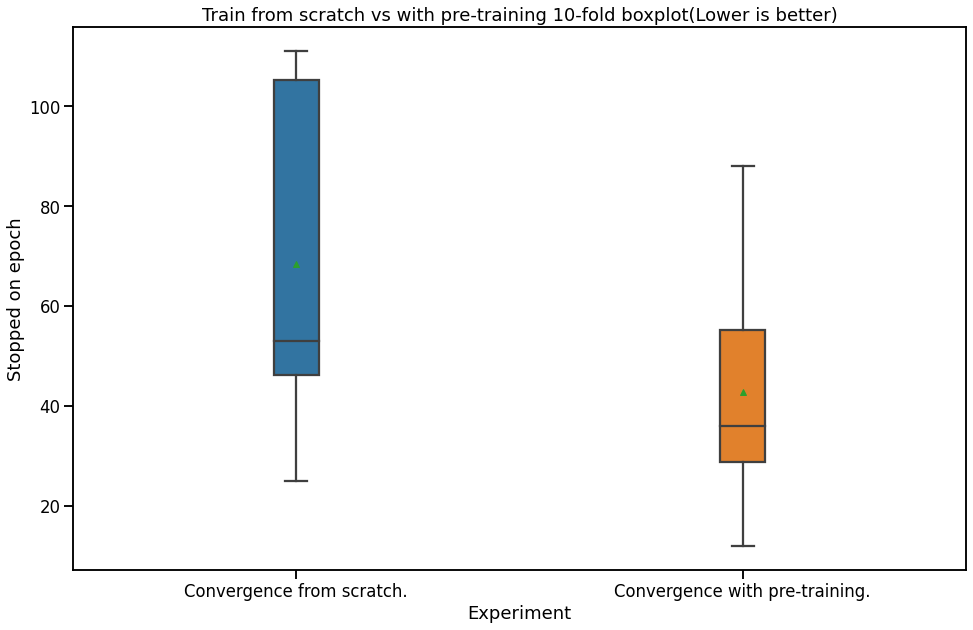

In [155]:
plt.title('Train from scratch vs with pre-training 10-fold boxplot(Lower is better)')
ax = sns.boxplot(x='Experiment', y='Stopped on epoch', data=df_ep, width=0.1, showmeans=True)
plt.savefig('assets/pretrain_box.png')

In [118]:
'Mean stopping epochs', 68.5, 42.7,

('Mean stopping epochs', 68.5, 42.7)